# Learning rate finder

In [1]:
import sys
sys.path.insert(0, '../src/')

import torch
from torch.utils.data import DataLoader
from torch.nn import CrossEntropyLoss
from torch.optim import SGD
import torch.backends.cudnn as cudnn

import torchvision
import torchvision.transforms as transforms

import resnet
from train_utils import train_model, lr_finder
from plots import plot_learning_curves, plot_lr_finder

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cudnn.benchmark = True

## Loading the datasets

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

In [4]:
trainset = torchvision.datasets.CIFAR10(root='../data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='../data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [10]:
print('Training dataset shape', trainset.train_data.shape)
print('Testing dataset shape', testset.test_data.shape)

Training dataset shape (50000, 32, 32, 3)
Testing dataset shape (10000, 32, 32, 3)


In [6]:
trainloader = DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)
testloader = DataLoader(testset, batch_size=128, shuffle=True, num_workers=2)

In [7]:
dset_loaders = {'train': trainloader, 'val': testloader}
dset_sizes = {'train': len(trainset.train_labels), 'val': len(testset.test_labels)}

## Defining the model

In [8]:
model = resnet.ResNet18()

if torch.cuda.is_available():
    model.cuda()

In [10]:
criterion = CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=0.001, momentum=0, weight_decay=5e-4)

## Learning rate finder

Gradually increase learning rate over the course of an entire epoch and save loss.

In [11]:
lrs, losses = lr_finder(model, trainloader, criterion, optimizer, lr_start=1e-8, lr_end=10)

Batch #0, LR 0.00000001 -> loss=2.298404
Batch #1, LR 0.00000001 -> loss=2.382953
Batch #2, LR 0.00000001 -> loss=2.342152
Batch #3, LR 0.00000001 -> loss=2.301818
Batch #4, LR 0.00000001 -> loss=2.306822
Batch #5, LR 0.00000001 -> loss=2.305044
Batch #6, LR 0.00000001 -> loss=2.357394
Batch #7, LR 0.00000001 -> loss=2.319985
Batch #8, LR 0.00000002 -> loss=2.359392
Batch #9, LR 0.00000002 -> loss=2.333412
Batch #10, LR 0.00000002 -> loss=2.290162
Batch #11, LR 0.00000002 -> loss=2.304114
Batch #12, LR 0.00000002 -> loss=2.307702
Batch #13, LR 0.00000002 -> loss=2.326162
Batch #14, LR 0.00000002 -> loss=2.346446
Batch #15, LR 0.00000002 -> loss=2.343554
Batch #16, LR 0.00000002 -> loss=2.352722
Batch #17, LR 0.00000002 -> loss=2.318210
Batch #18, LR 0.00000003 -> loss=2.325449
Batch #19, LR 0.00000003 -> loss=2.327001
Batch #20, LR 0.00000003 -> loss=2.339136
Batch #21, LR 0.00000003 -> loss=2.303904
Batch #22, LR 0.00000003 -> loss=2.334161
Batch #23, LR 0.00000003 -> loss=2.339586
Ba

Batch #195, LR 0.00031623 -> loss=2.335891
Batch #196, LR 0.00033349 -> loss=2.304139
Batch #197, LR 0.00035169 -> loss=2.317147
Batch #198, LR 0.00037088 -> loss=2.315852
Batch #199, LR 0.00039112 -> loss=2.314094
Batch #200, LR 0.00041246 -> loss=2.339687
Batch #201, LR 0.00043497 -> loss=2.311824
Batch #202, LR 0.00045871 -> loss=2.323607
Batch #203, LR 0.00048374 -> loss=2.301399
Batch #204, LR 0.00051014 -> loss=2.286300
Batch #205, LR 0.00053798 -> loss=2.276192
Batch #206, LR 0.00056734 -> loss=2.315451
Batch #207, LR 0.00059831 -> loss=2.288101
Batch #208, LR 0.00063096 -> loss=2.312065
Batch #209, LR 0.00066539 -> loss=2.343577
Batch #210, LR 0.00070170 -> loss=2.284803
Batch #211, LR 0.00074000 -> loss=2.322392
Batch #212, LR 0.00078038 -> loss=2.294017
Batch #213, LR 0.00082297 -> loss=2.299768
Batch #214, LR 0.00086788 -> loss=2.316959
Batch #215, LR 0.00091525 -> loss=2.314916
Batch #216, LR 0.00096520 -> loss=2.321444
Batch #217, LR 0.00101787 -> loss=2.289524
Batch #218,

Batch #387, LR 8.52646926 -> loss=2.362599
Batch #388, LR 8.99178996 -> loss=2.259706
Batch #389, LR 9.48250492 -> loss=2.362360
Batch #390, LR 10.00000000 -> loss=2.431063


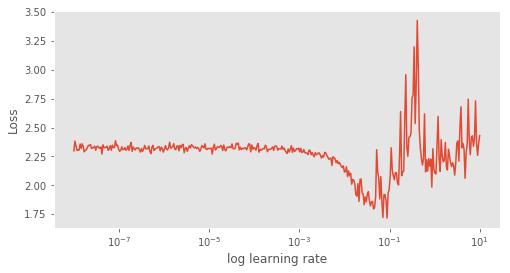

In [14]:
plot_lr_finder(lrs, losses)